In [ ]:
# PyTorch Neural Network Classification

# A classification problem involves predicting whether 
# something is one thing or another.


In [ ]:
# What we're going to cover
# Architecture of a classification neural network

In [ ]:
# 1. Make classification data and get it ready

In [ ]:
# 2.1 Setup loss function and optimizer

In [ ]:
# 3. Train model

In [ ]:
# 3.2 Building a training and testing loop

In [ ]:
# 4. Make predictions and evaluate the model

In [4]:
import torch

In [8]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples, noise=0.03, random_state=42)

In [9]:
print(X[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [10]:
print(y[:5])

[1 1 1 1 0]


In [14]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                    "X2":X[:,1],
                    "Lable":y})

In [15]:
circles.head(5)

,X1,X2,Lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [18]:
#count
circles.Lable.value_counts()

1    500
0    500
Name: Lable, dtype: int64

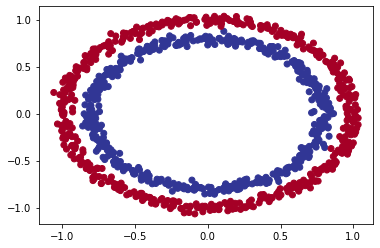

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu);

In [20]:
# 1.1 Input and output shapes

In [22]:
X.shape, y.shape

((1000, 2), (1000,))

In [23]:
X_sample=X[0]
y_sample=y[0]
X_sample, y_sample,X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

In [24]:
# 1.2 Turn data into tensors and create train and test splits

In [25]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [27]:
# 2. Building a model

In [30]:
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [33]:
class CircleModleV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
        
    def forward(self,x):
        return self.layer_2(self.layer_1(x))
    
    
model_0=CircleModleV0().to(device)
model_0

CircleModleV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)